In [44]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib notebook

In [2]:
wine = datasets.load_wine()

In [3]:
df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
df['target'] = wine['target']
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df.shape
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [6]:
## Test Train Split

In [7]:
X = df
y = X.pop('target')

In [8]:
X.head

<bound method NDFrame.head of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonf

In [11]:
y.unique()

array([0, 1, 2])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 55)

In [13]:
X_train.shape

(142, 13)

In [14]:
X_test.shape

(36, 13)

In [15]:
## Train Classifer

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
knn.score(X_test, y_test)

0.8333333333333334

In [20]:
## Fine Tune the model with parameter

<IPython.core.display.Javascript object>


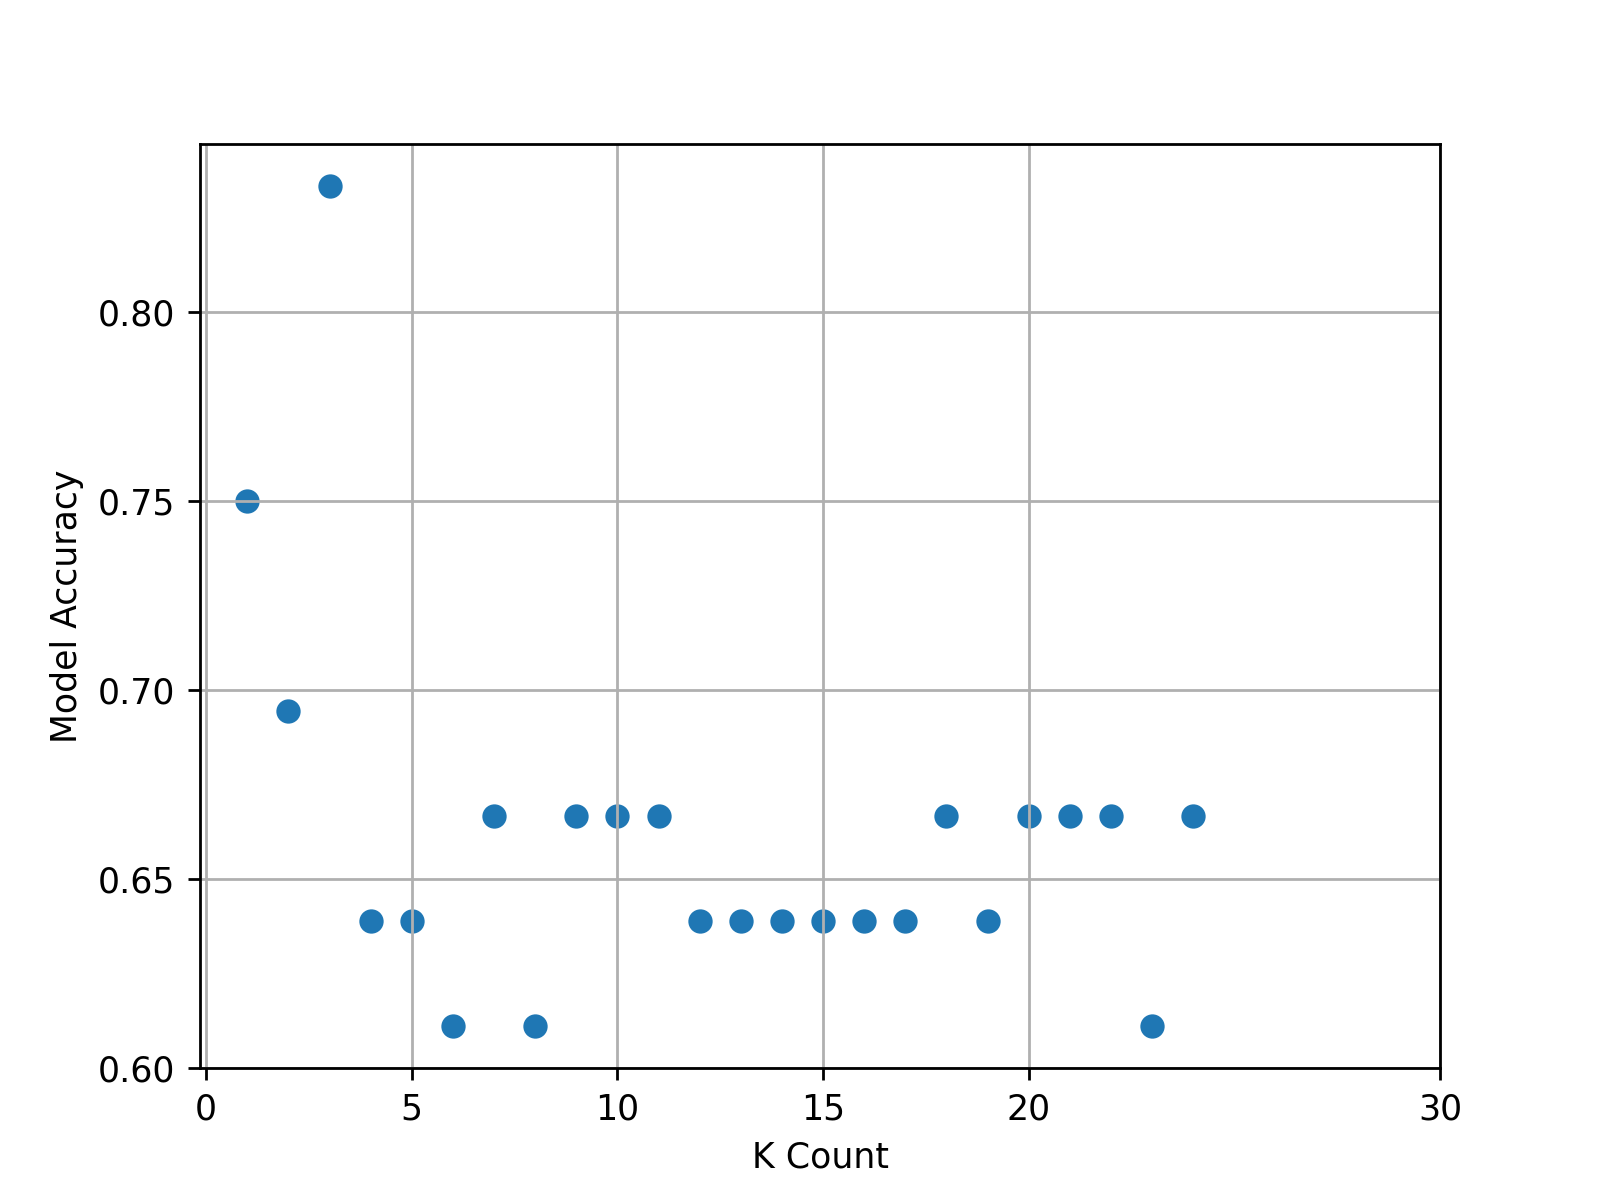

In [26]:
k_range = range(1,25)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('K Count')
plt.ylabel('Model Accuracy')
plt.scatter(k_range, scores)
plt.grid()
plt.xticks([0,5,10,15,20,30])
plt.show()


<IPython.core.display.Javascript object>


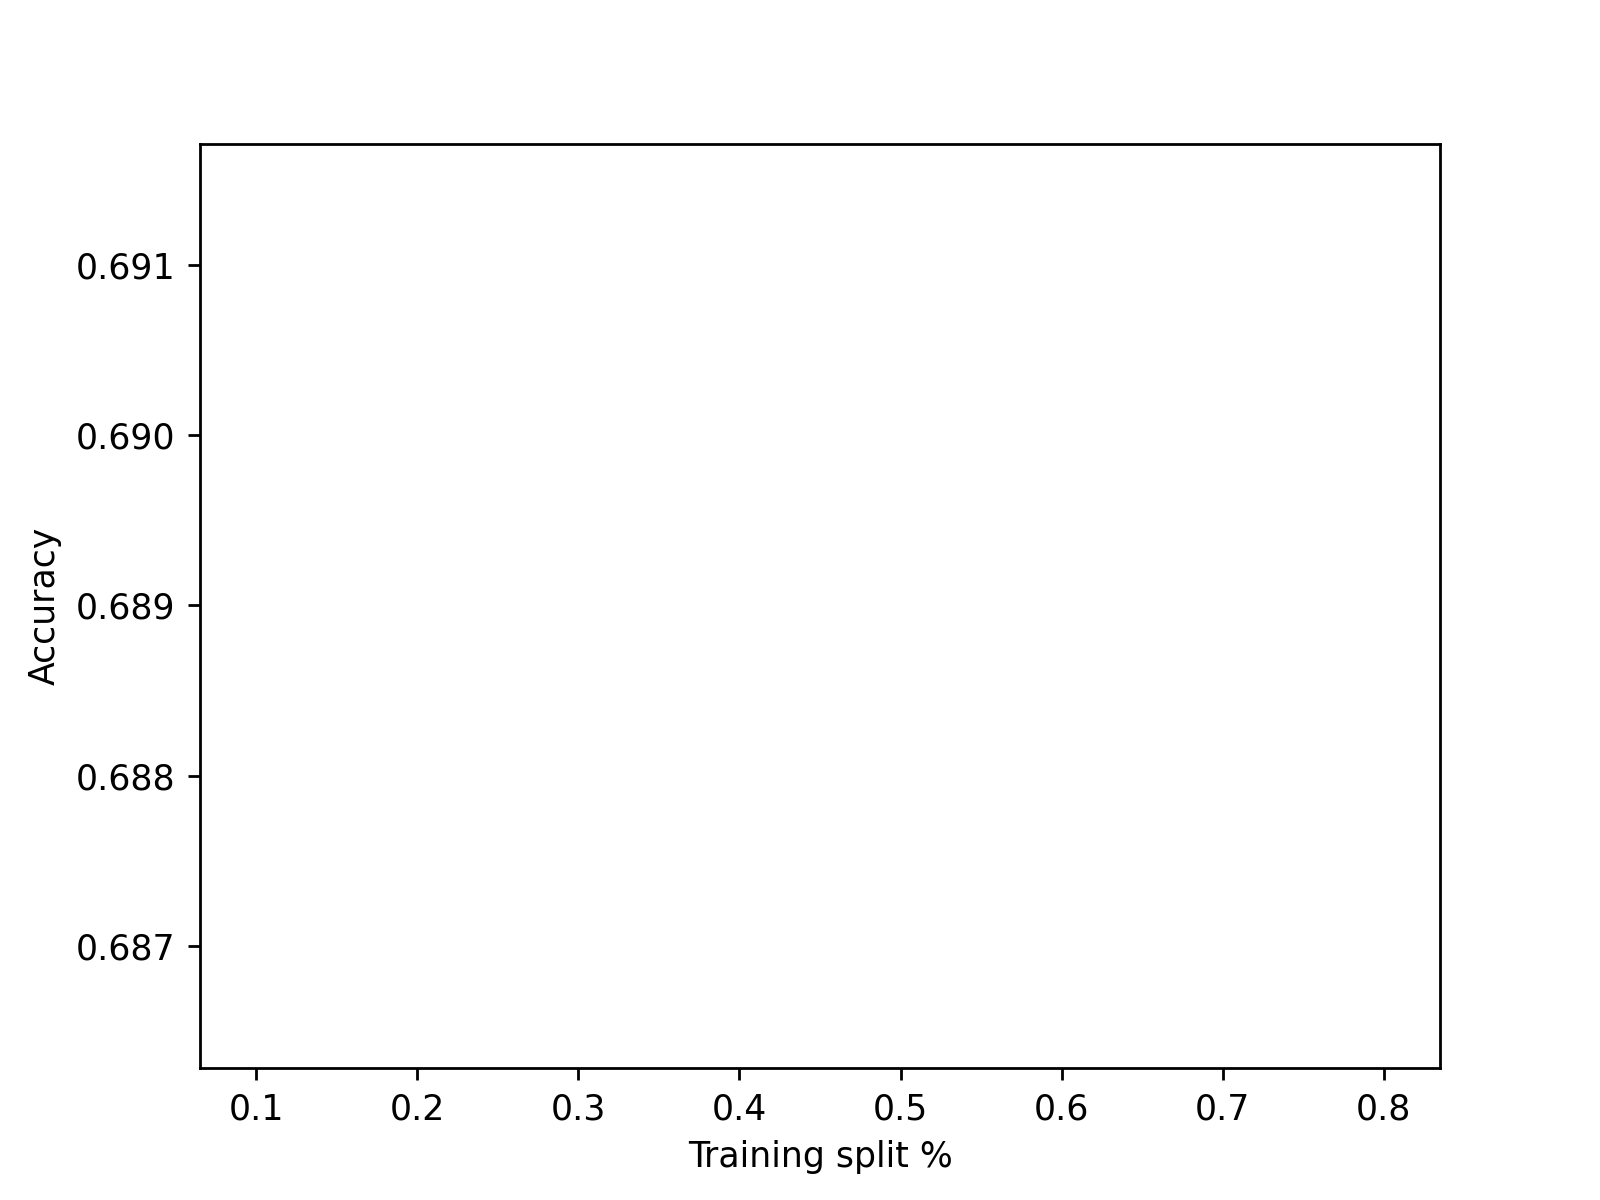

Text(0, 0.5, 'Accuracy')

In [35]:
test_sizes = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

knn = KNeighborsClassifier(n_neighbors=5)

plt.figure()

for test_size in test_sizes:
    score = []
    
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1 - test_size)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(test_size, np.mean(scores))

plt.xlabel('Training split %')
plt.ylabel('Accuracy')

        

In [36]:
## Make Prediction

In [37]:
prediction = knn.predict(X_test)

In [38]:
prediction

array([2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0,
       1, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 0, 0,
       1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0,
       1, 2, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1,
       2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 2,
       0, 2, 0, 2, 0, 0, 2])

In [39]:
y_test

164    2
41     0
121    1
56     0
122    1
      ..
55     0
104    1
18     0
7      0
82     1
Name: target, Length: 161, dtype: int32

In [41]:
cm = confusion_matrix(y_test, prediction)

In [42]:
cm

array([[46,  6,  1],
       [ 3, 40, 21],
       [ 2, 14, 28]], dtype=int64)

<IPython.core.display.Javascript object>


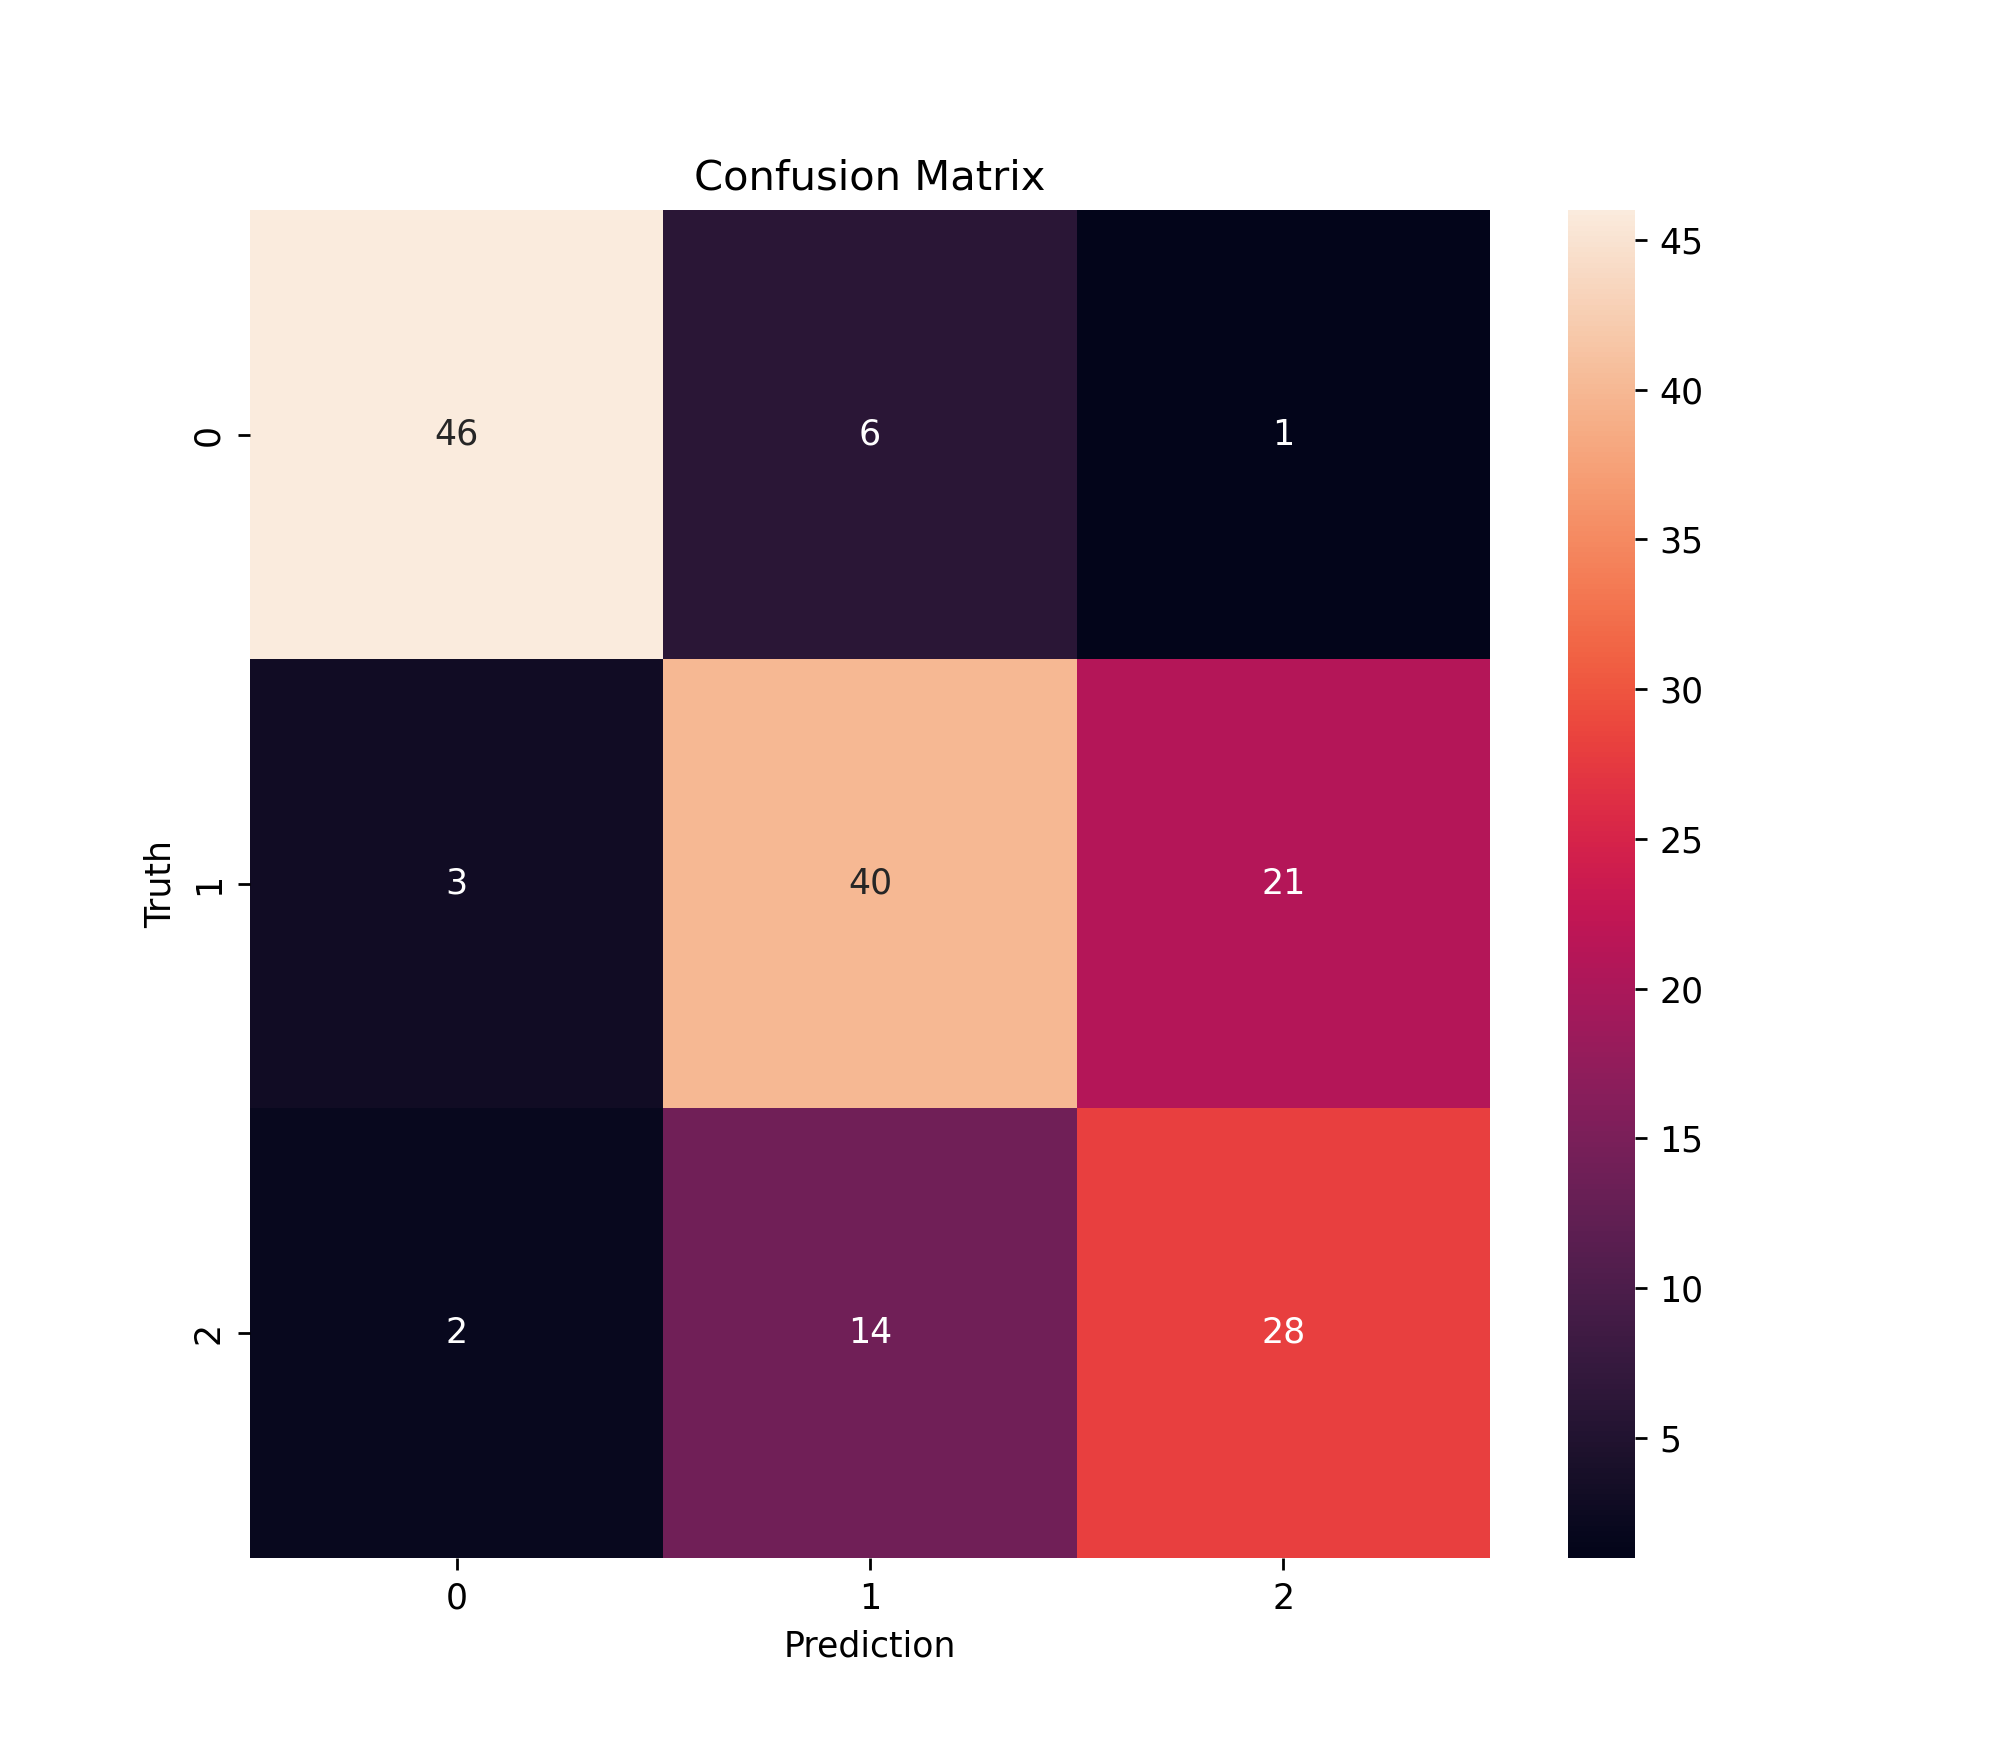

In [47]:
plt.figure(figsize = (8,7))
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show()

In [50]:
from subprocess import check_output


In [52]:
data = pd.read_csv(HR_comma_sep.csv)

NameError: name 'HR_comma_sep' is not defined